In [1]:
# ✅ STEP 1: Install Prophet
!pip install prophet

# ✅ STEP 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# ✅ STEP 3: Create Dummy Sales Data
# Simulating 6 months of daily sales data with a trend & seasonality
date_range = pd.date_range(start='2023-01-01', end='2023-06-30')
np.random.seed(42)
sales = 200 + np.sin(np.linspace(0, 10, len(date_range))) * 20 + np.random.normal(scale=10, size=len(date_range))

df = pd.DataFrame({'ds': date_range, 'y': sales})
df.head()


,ds,y
0,2023-01-01,204.967142
1,2023-01-02,199.727897
2,2023-01-03,208.694538
3,2023-01-04,218.548221
4,2023-01-05,202.066421


In [2]:
# Train the Prophet model
model = Prophet()
model.fit(df)

# Make future dataframe for 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw1o47nq7/gvaq5nps.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw1o47nq7/4axxv8bc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38576', 'data', 'file=/tmp/tmpw1o47nq7/gvaq5nps.json', 'init=/tmp/tmpw1o47nq7/4axxv8bc.json', 'output', 'file=/tmp/tmpw1o47nq7/prophet_modell2urstdp/prophet_model-20250714113959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:39:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:39:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


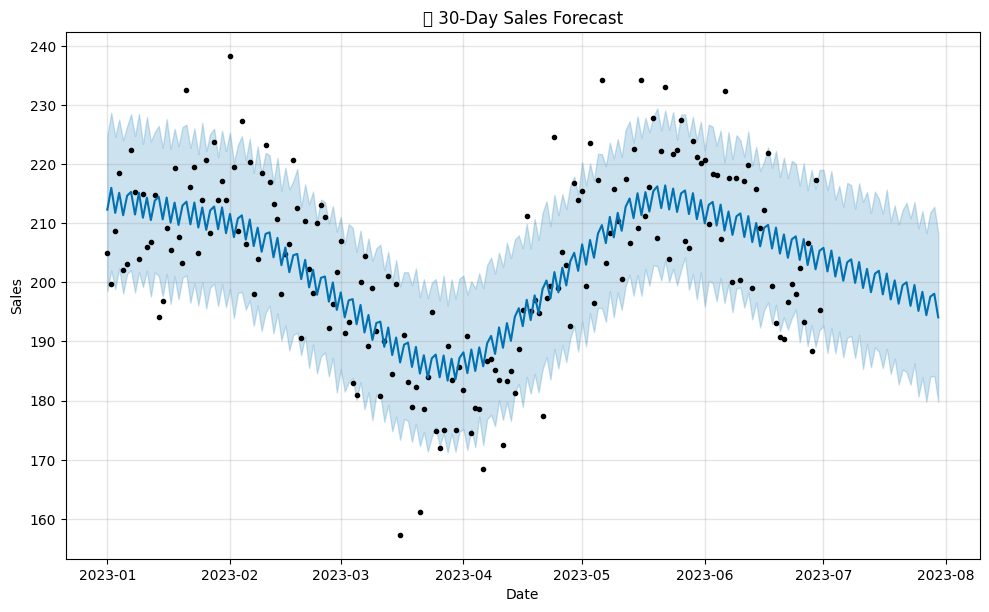

In [3]:
# Plot the forecast
model.plot(forecast)
plt.title("📈 30-Day Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


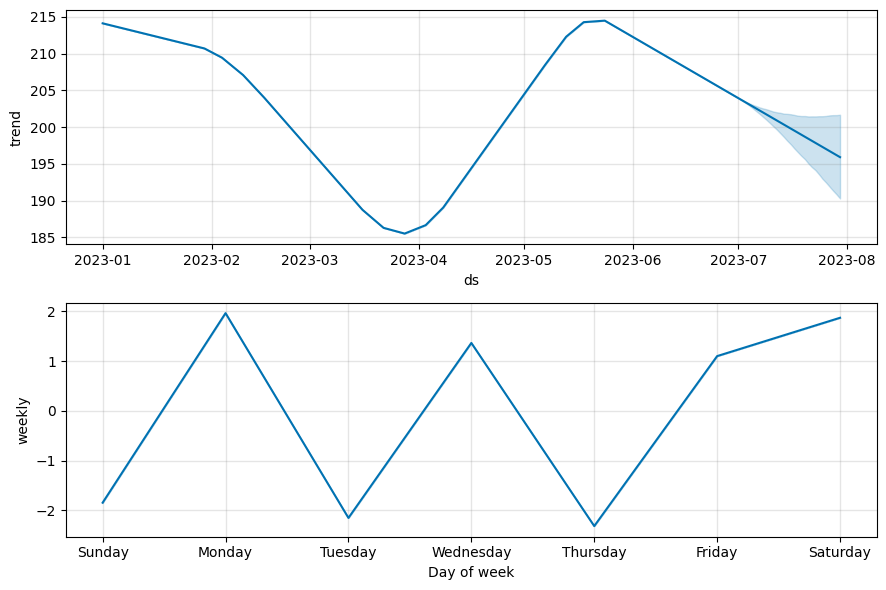

In [4]:
# Plot seasonal components
model.plot_components(forecast)
plt.show()


In [5]:
# Show forecast only for the next 30 days
future_forecast = forecast[forecast['ds'] > df['ds'].max()]
future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


,ds,yhat,yhat_lower,yhat_upper
181,2023-07-01,205.838492,192.649081,219.053331
182,2023-07-02,201.845498,188.051966,215.609863
183,2023-07-03,205.377102,192.240153,218.818028
184,2023-07-04,200.985219,188.016516,213.976926
185,2023-07-05,204.223754,191.686514,216.345712


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


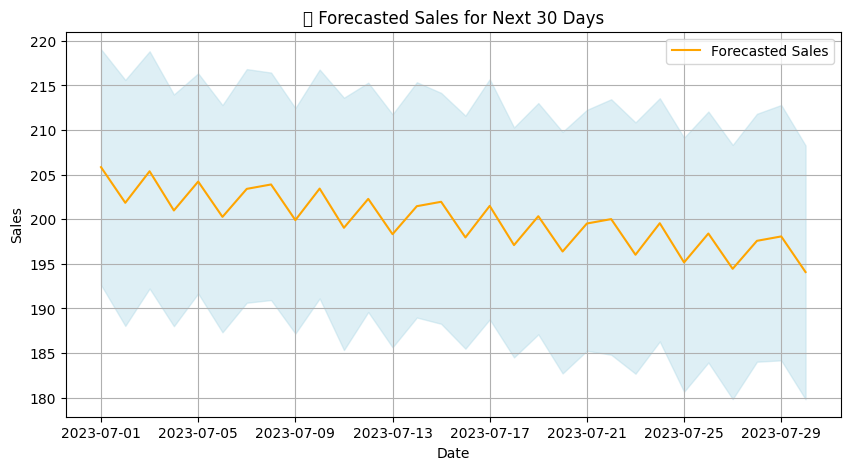

In [6]:
import matplotlib.pyplot as plt

# Plot only the forecasted 30 days
plt.figure(figsize=(10, 5))
plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Forecasted Sales', color='orange')
plt.fill_between(future_forecast['ds'], future_forecast['yhat_lower'], future_forecast['yhat_upper'], color='lightblue', alpha=0.4)
plt.title("📊 Forecasted Sales for Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()
